In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

**What is the average sleep duration in the dataset?**

In [7]:
mean_sleep_duration = data['Sleep Duration'].mean()
median_sleep_duration = data['Sleep Duration'].median()
print("Mean Sleep Duration:", mean_sleep_duration)
print("Median Sleep Duration:", median_sleep_duration)


Mean Sleep Duration: 7.132085561497325
Median Sleep Duration: 7.2


**How does sleep quality vary with age and gender?**

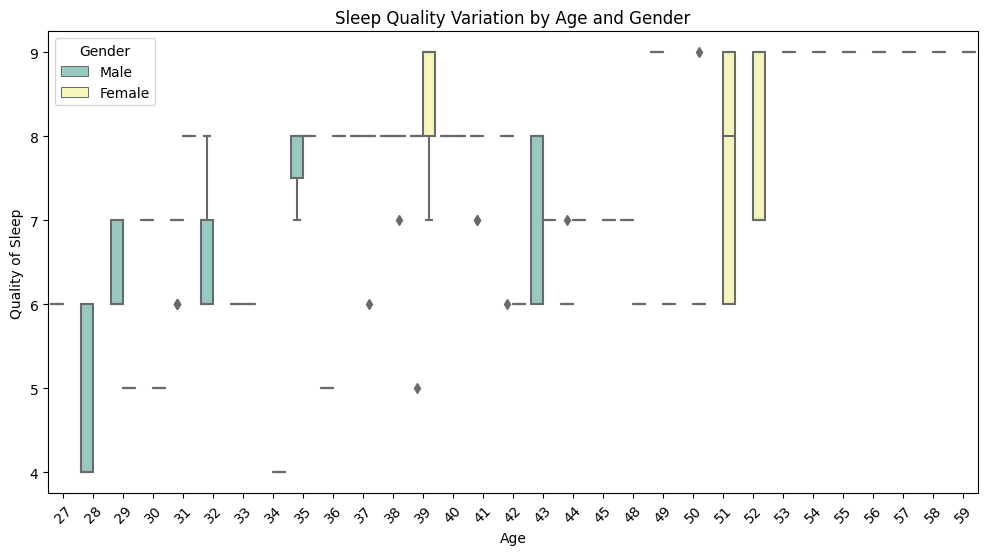

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x="Age", y="Quality of Sleep", hue="Gender", data=data, palette="Set3")
plt.title("Sleep Quality Variation by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Quality of Sleep")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()


**Is there a correlation between stress levels and sleep duration?**

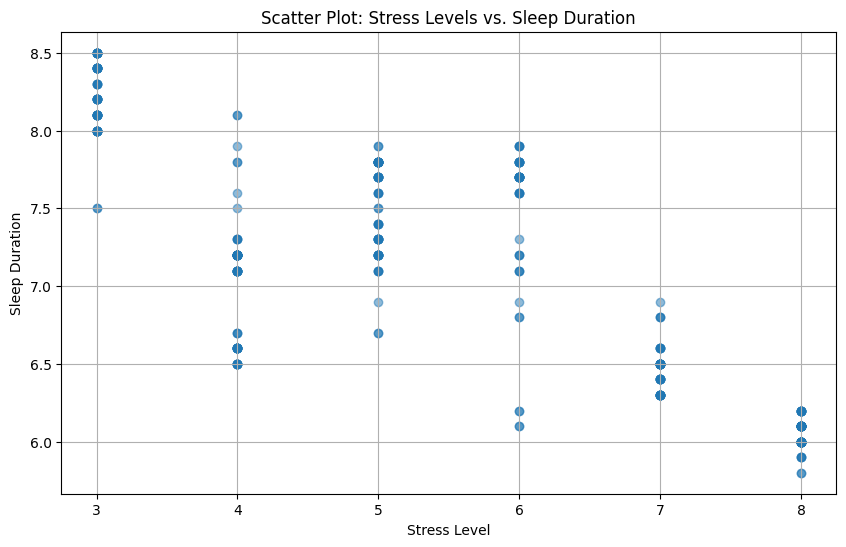

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Stress Level'], data['Sleep Duration'], alpha=0.5)
plt.title("Scatter Plot: Stress Levels vs. Sleep Duration")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration")
plt.grid(True)
plt.show()


**What is the distribution of BMI categories in the dataset?**

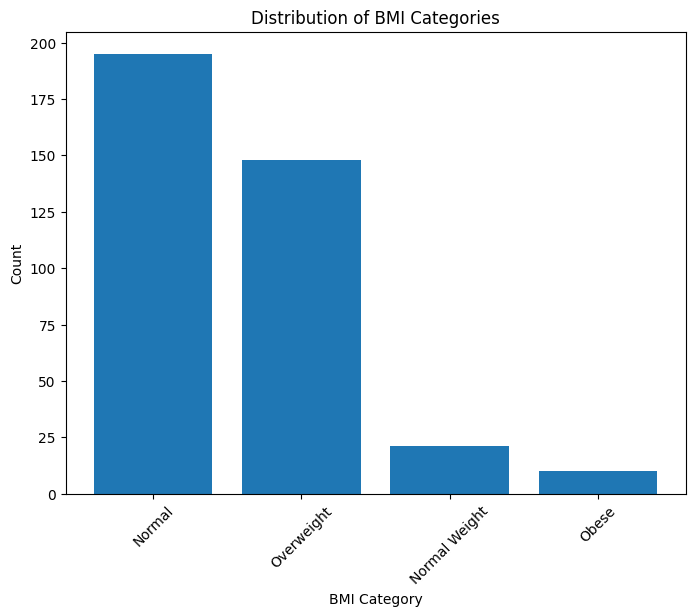

In [10]:
bmi_counts = data['BMI Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(bmi_counts.index, bmi_counts.values)
plt.title("Distribution of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Are there any trends in heart rate based on physical activity level?**

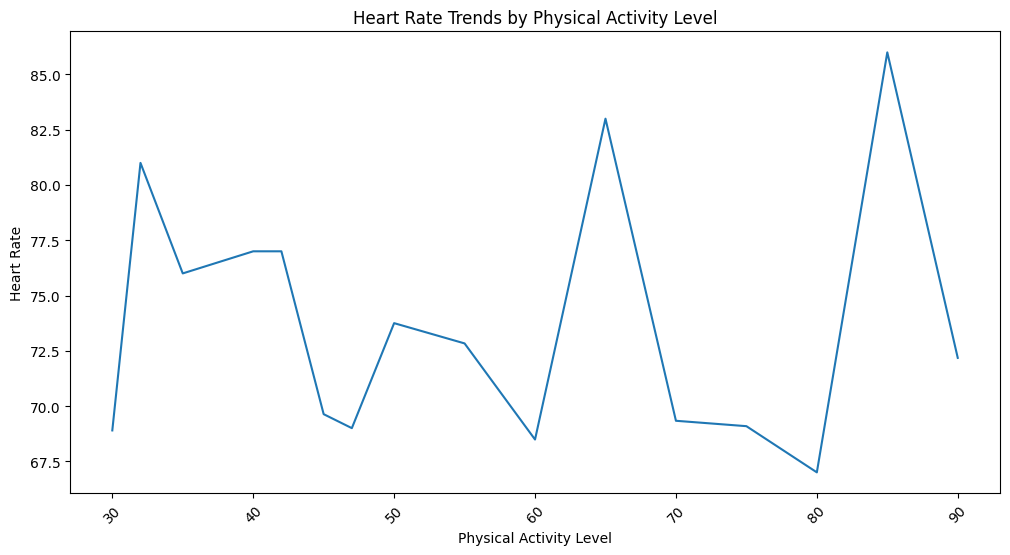

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Physical Activity Level", y="Heart Rate", data=data, ci=None)
plt.title("Heart Rate Trends by Physical Activity Level")
plt.xlabel("Physical Activity Level")
plt.ylabel("Heart Rate")
plt.xticks(rotation=45)
plt.show()


**Do people with sleep disorders have lower sleep quality on average?**

In [12]:
with_sleep_disorder = data[data['Sleep Disorder'] == 'Yes']['Quality of Sleep']
without_sleep_disorder = data[data['Sleep Disorder'] == 'No']['Quality of Sleep']

t_statistic, p_value = stats.ttest_ind(with_sleep_disorder, without_sleep_disorder)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("There is a significant difference in sleep quality between groups.")
else:
    print("There is no significant difference in sleep quality between groups.")


T-Statistic: nan
P-Value: nan
There is no significant difference in sleep quality between groups.


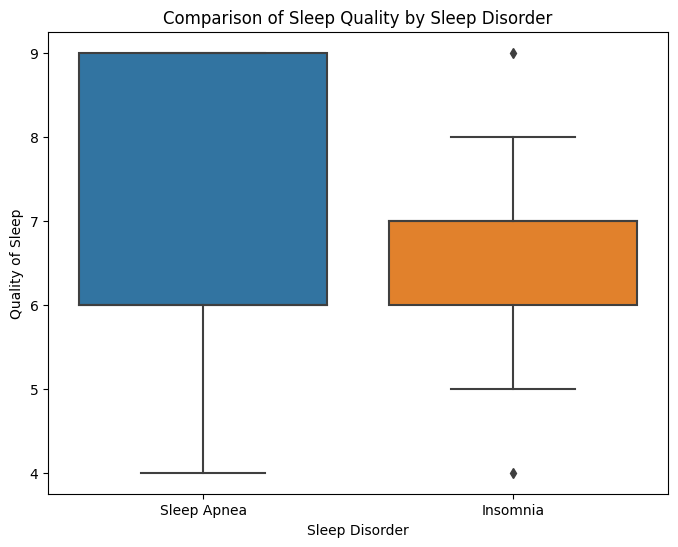

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=data)
plt.title("Comparison of Sleep Quality by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Quality of Sleep")
plt.show()


**How does occupation affect daily steps taken?**

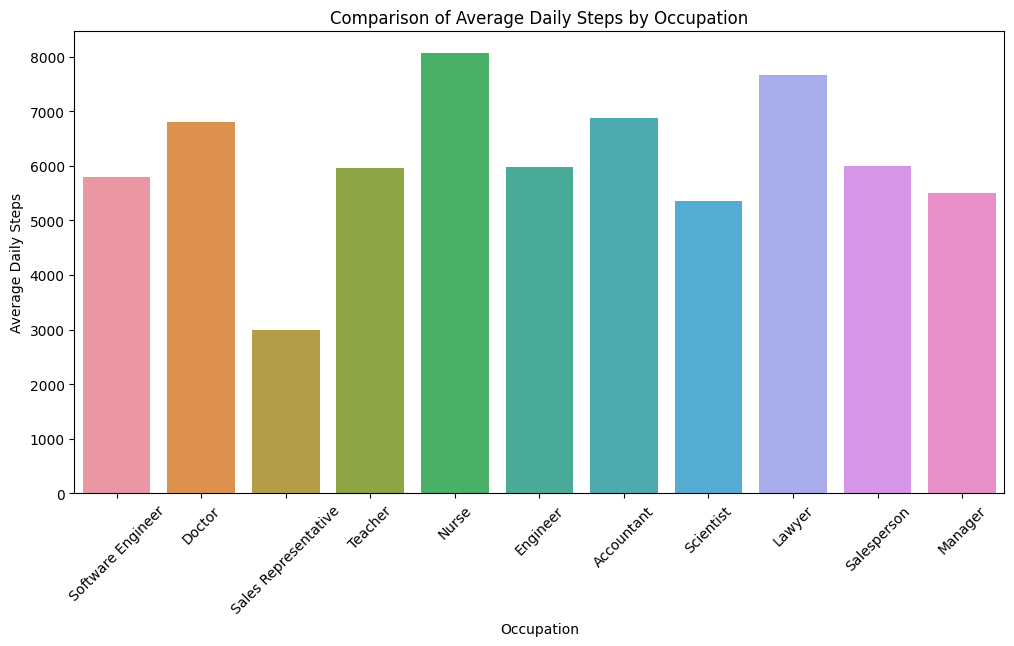

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Occupation", y="Daily Steps", data=data, ci=None)
plt.title("Comparison of Average Daily Steps by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Daily Steps")
plt.xticks(rotation=45)
plt.show()


**Are there any patterns in blood pressure across different age groups?**

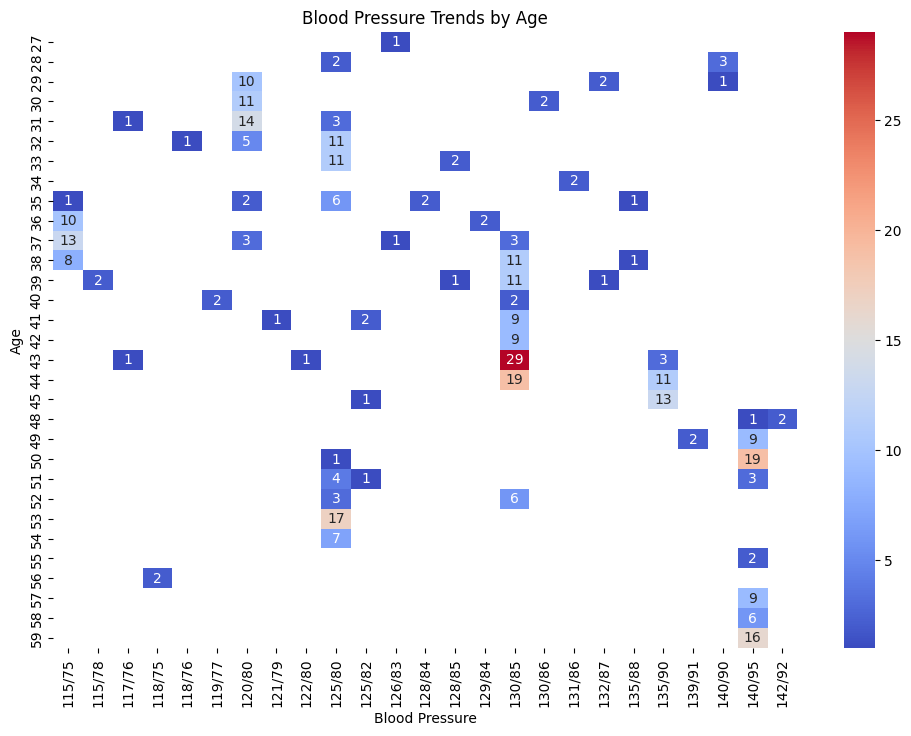

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_data = data.pivot_table(index='Age', columns='Blood Pressure', values='Person ID', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g', cbar=True)
plt.title("Blood Pressure Trends by Age")
plt.xlabel("Blood Pressure")
plt.ylabel("Age")
plt.show()


*Create a line plot to visualize blood pressure trends by age*

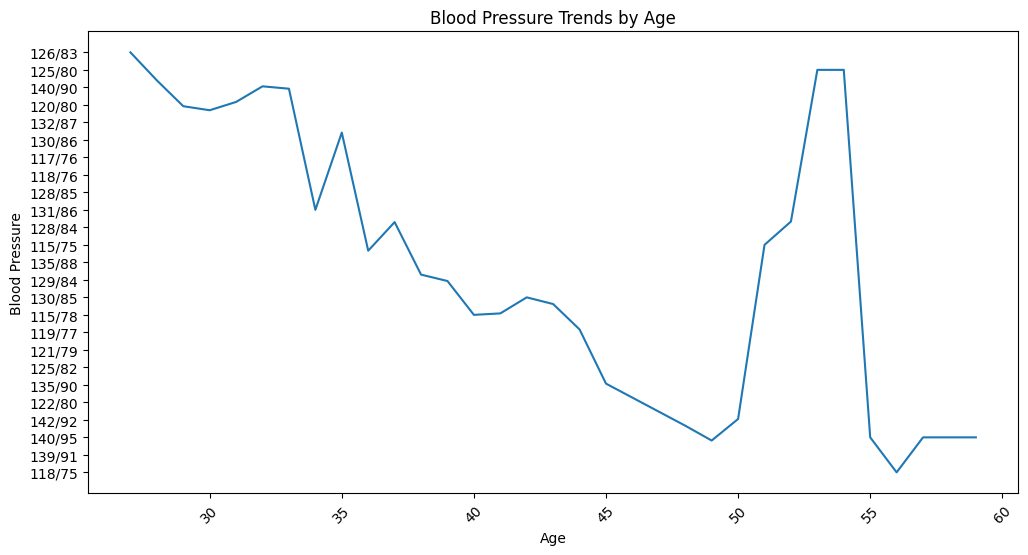

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="Blood Pressure", data=data, ci=None)
plt.title("Blood Pressure Trends by Age")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.xticks(rotation=45)
plt.show()

**Is there a correlation between stress levels and sleep duration?**

In [17]:
correlation_coefficient = np.corrcoef(data['Stress Level'], data['Sleep Duration'])[0, 1]
print("Pearson Correlation Coefficient:", correlation_coefficient)

if correlation_coefficient > 0:
    print("There is a positive correlation between stress levels and sleep duration.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between stress levels and sleep duration.")
else:
    print("There is no significant correlation between stress levels and sleep duration.")


Pearson Correlation Coefficient: -0.8110230278940451
There is a negative correlation between stress levels and sleep duration.


**Correlation between all numeric variables in the dataset**

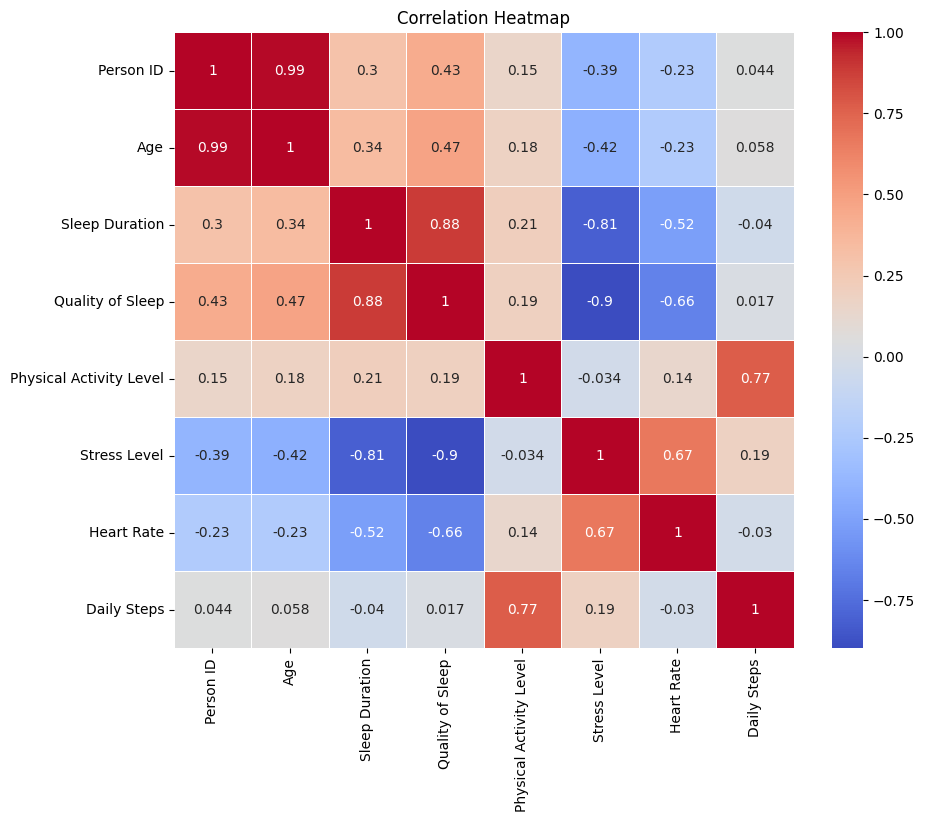

In [18]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**Age vs. Sleep Duration**

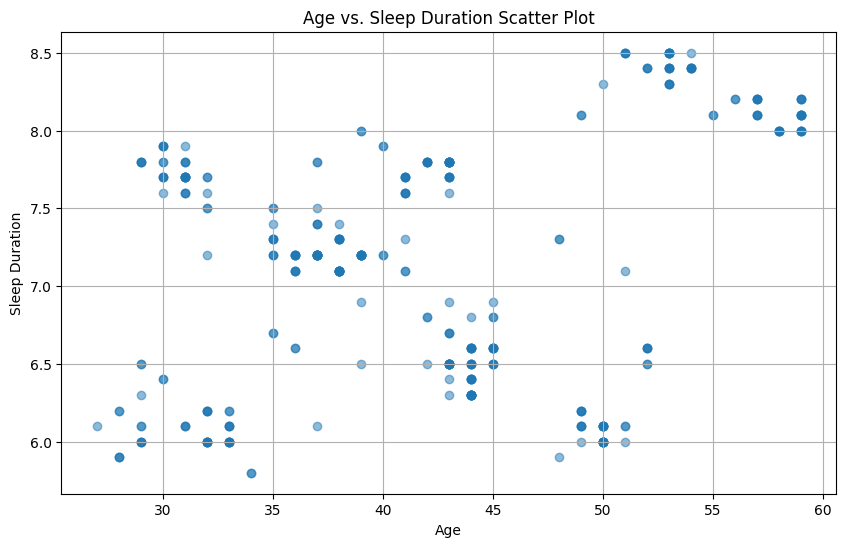

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Sleep Duration'], alpha=0.5)
plt.title("Age vs. Sleep Duration Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Sleep Duration")
plt.grid(True)
plt.show()


**Stress Level by Gender**

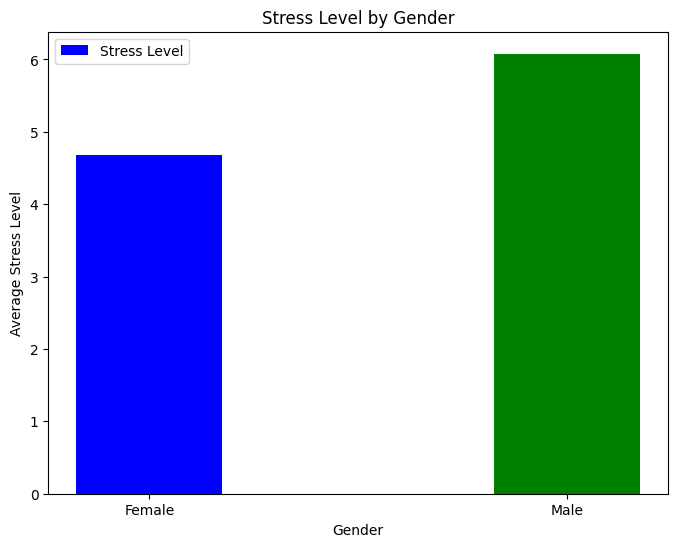

In [20]:
gender_stress = data.groupby('Gender')['Stress Level'].mean()
x = np.arange(len(gender_stress))
width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(x, gender_stress, width, label='Stress Level', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Average Stress Level')
plt.title('Stress Level by Gender')
plt.xticks(x, gender_stress.index)
plt.legend()
plt.show()


**BMI Category Distribution**

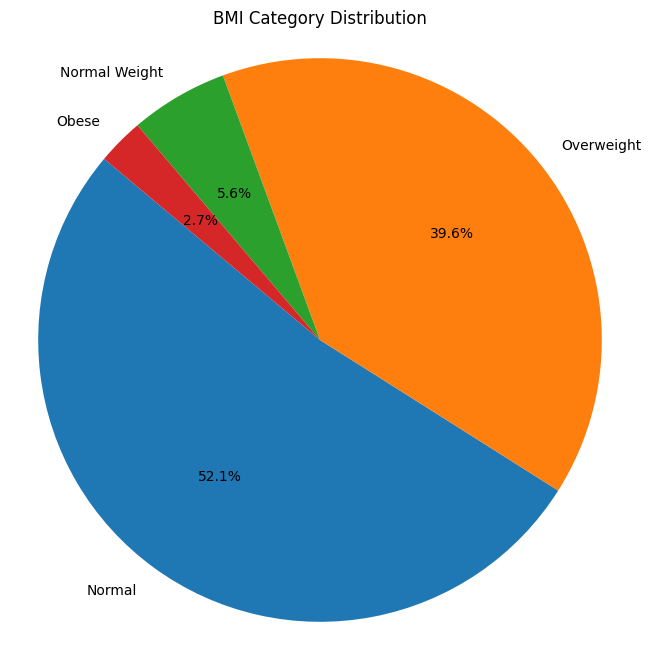

In [21]:
bmi_counts = data['BMI Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("BMI Category Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()


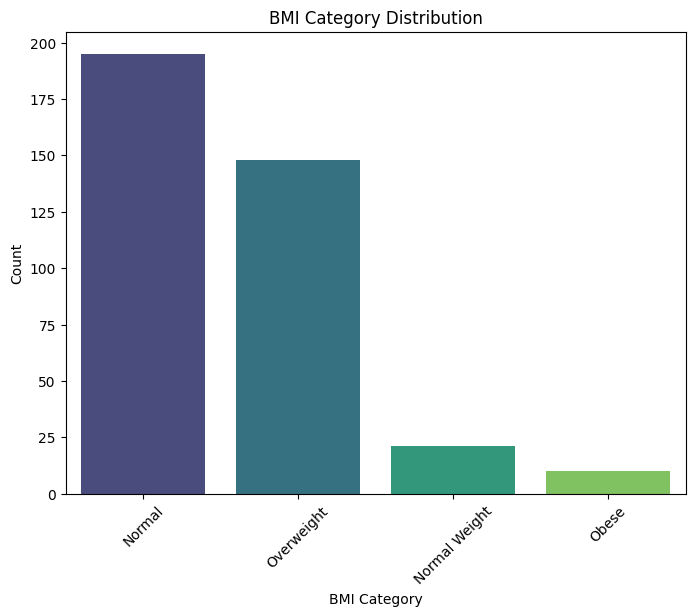

In [22]:
bmi_counts = data['BMI Category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette="viridis")
plt.title("BMI Category Distribution")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Occupation vs. Daily Steps Box Plot**

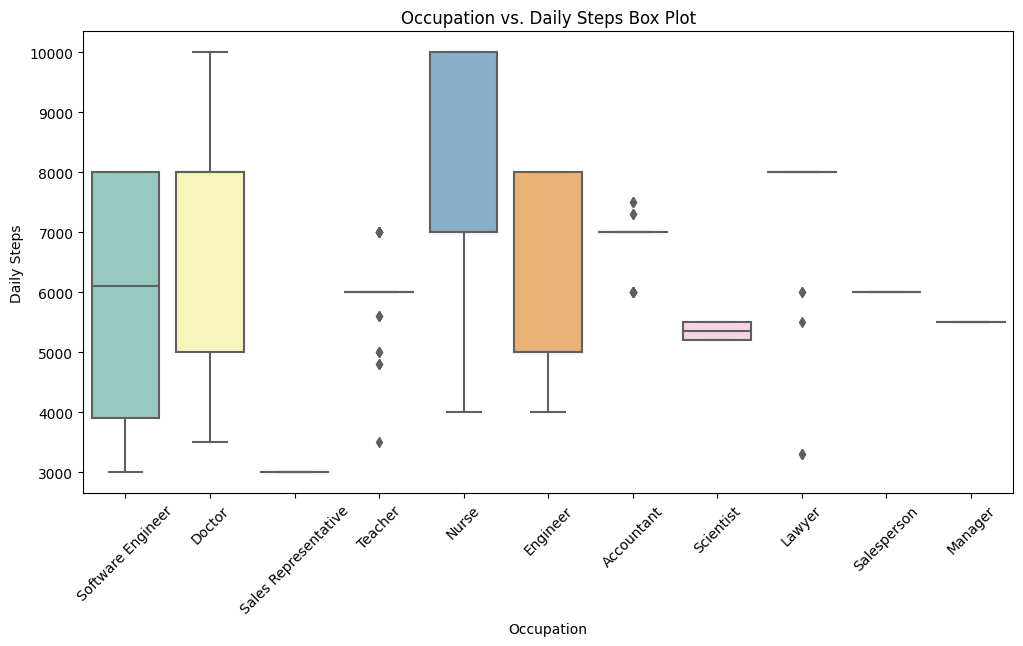

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x="Occupation", y="Daily Steps", data=data, palette="Set3")
plt.title("Occupation vs. Daily Steps Box Plot")
plt.xlabel("Occupation")
plt.ylabel("Daily Steps")
plt.xticks(rotation=45)
plt.show()


**Sleep Disorder Distribution**

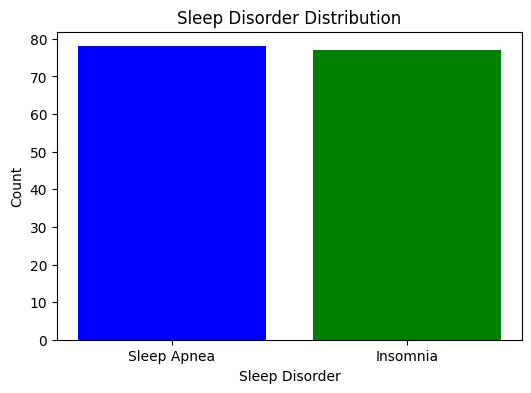

In [24]:
sleep_disorder_counts = data['Sleep Disorder'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(sleep_disorder_counts.index, sleep_disorder_counts.values, color=['blue', 'green'])
plt.title("Sleep Disorder Distribution")
plt.xlabel("Sleep Disorder")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [25]:
data.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
